# Kernel methods for biological sequence classification

MVA 2019 - Kernel methods for machine learning

*Éloïse Berthier, Guillaume Dalle, Clément Mantoux*

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
import backend
from kernels import LinearKernel, GaussianKernel, GramCSVKernel, FeatureCSVKernel, MultipleKernel

Academic license - for non-commercial use only


Kernel computed on the fly on imported data

In [4]:
linear = LinearKernel().load("mat100", indices=[0, 1, 2])
gaussian = GaussianKernel(0.1).load("mat100", indices=[0, 1, 2])

Linear kernel computed on the fly on imported features

In [5]:
spectral3 = FeatureCSVKernel("SpectralKernel3", {}).load("spectr3", indices=[0, 1, 2])
spectral6 = FeatureCSVKernel("SpectralKernel6", {}).load("spectr6", indices=[0, 1, 2])
translated6 = FeatureCSVKernel("TranslatedKernel", {}).load("trans6", indices=[0, 1, 2])

In [6]:
mck1 = FeatureCSVKernel("MarginalizedCountKernel1", {}).load("HMM_MCK1", indices=[0, 1, 2])
mck2 = FeatureCSVKernel("MarginalizedCountKernel2", {}).load("HMM_MCK2", indices=[0, 1, 2])

Precomputed kernel defined from stored Gram matrices

In [7]:
substring = GramCSVKernel("SubstringKernel", {}).load("substring4_0.7", indices=[0])

Parameter tuning

In [11]:
lambdas = np.logspace(-3, -1, 10)

Tuning lambda on dataset 0 with kernel MultipleKernel and params {'kernel_names': ['LinearKernel', 'SpectralKernel6', 'MarginalizedCountKernel2'], 'kernel_params': [{'suffix': 'mat100'}, {'suffix': 'spectr6'}, {'suffix': 'HMM_MCK2'}], 'grad_step': 0.5, 'iterations': 0}: 100%|██████████| 10/10 [00:22<00:00,  2.16s/it]


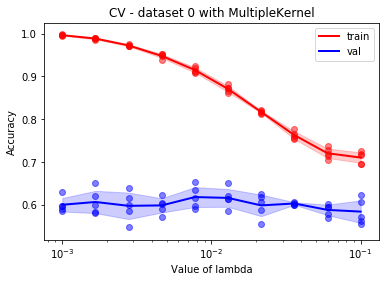

Tuning lambda on dataset 1 with kernel MultipleKernel and params {'kernel_names': ['LinearKernel', 'SpectralKernel6', 'MarginalizedCountKernel2'], 'kernel_params': [{'suffix': 'mat100'}, {'suffix': 'spectr6'}, {'suffix': 'HMM_MCK2'}], 'grad_step': 0.5, 'iterations': 0}: 100%|██████████| 10/10 [00:21<00:00,  2.13s/it]


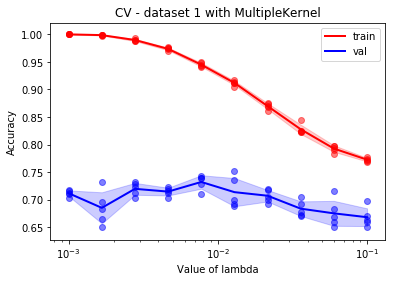

Tuning lambda on dataset 2 with kernel MultipleKernel and params {'kernel_names': ['LinearKernel', 'SpectralKernel6', 'MarginalizedCountKernel2'], 'kernel_params': [{'suffix': 'mat100'}, {'suffix': 'spectr6'}, {'suffix': 'HMM_MCK2'}], 'grad_step': 0.5, 'iterations': 0}: 100%|██████████| 10/10 [00:21<00:00,  2.10s/it]


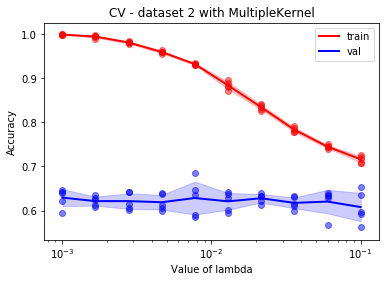

In [12]:
three_kernels = []
three_lambdas = []

use_multiple_kernel = True

for d in [0, 1, 2]:
    
    kernels_to_combine_or_compare = [
        linear[d],
        # gaussian[d],
        # spectral3[d],
        spectral6[d],
        # translated6[d],
        # mck1[d],
        mck2[d],
    ]

    if use_multiple_kernel:
        
        best_kernel = MultipleKernel(
            kernels_to_combine_or_compare,
            grad_step=5e-1, iterations=0)
        best_lambd = backend.tune_parameters(
            [best_kernel], lambdas,
            plot=True, result="best_lambdas")[0]
        
    else:
        best_kernel, best_lambd = backend.tune_parameters(
            kernels_to_combine_or_compare, lambdas,
            plot=True, result="best_kernel_lambda")
        
    three_kernels.append(best_kernel)
    three_lambdas.append(best_lambd)

In [13]:
backend.final_prediction(three_kernels, three_lambdas)

DATASET 0
DATASET 1
DATASET 2
